In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [10]:
df=pd.read_csv('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


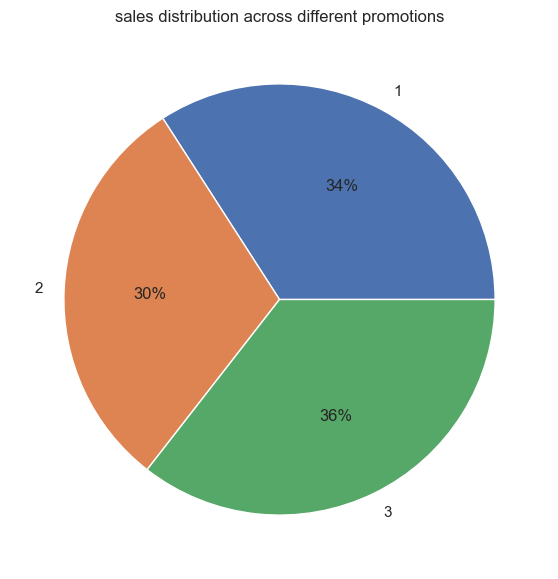

In [11]:
ax = df.groupby(
'Promotion'
).sum()[
'SalesInThousands'
].plot.pie(
figsize=(7, 7),
autopct='%1.0f%%'
)
ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')
plt.show()

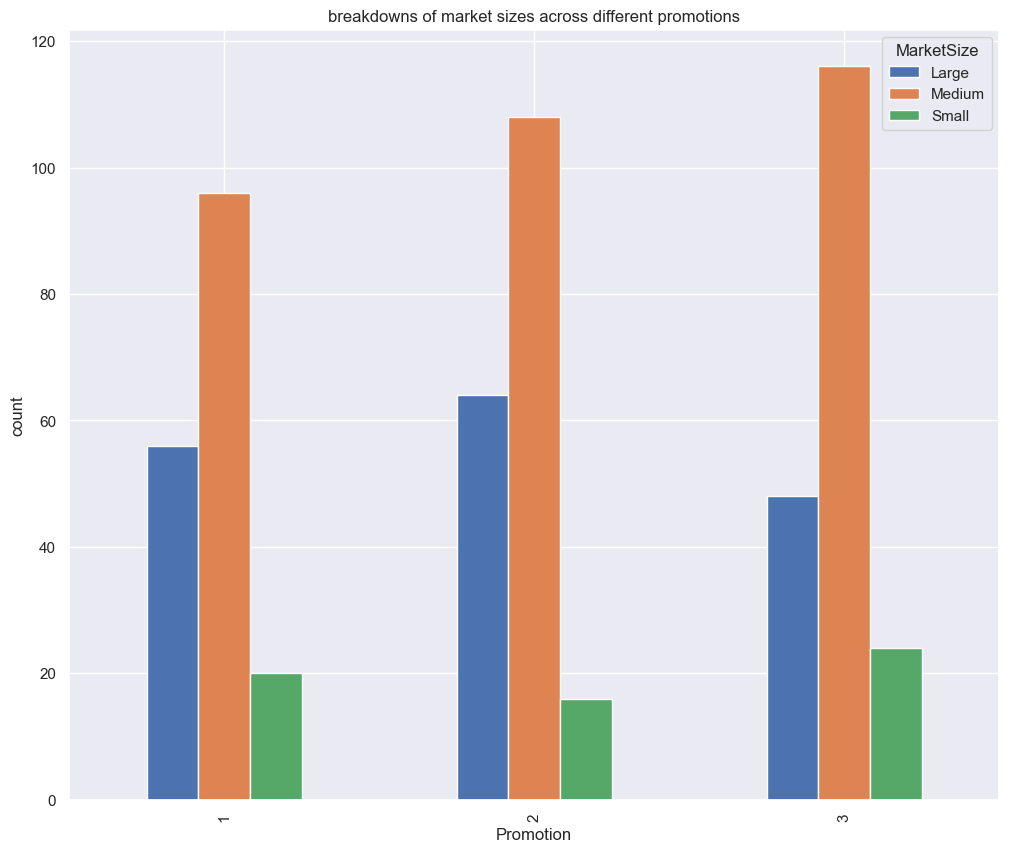

In [13]:
ax = df.groupby([
'Promotion', 'MarketSize'
]).count()[
'MarketID'
].unstack(
'MarketSize'
).plot(
kind='bar',
figsize=(12,10),
grid=True,
)
ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

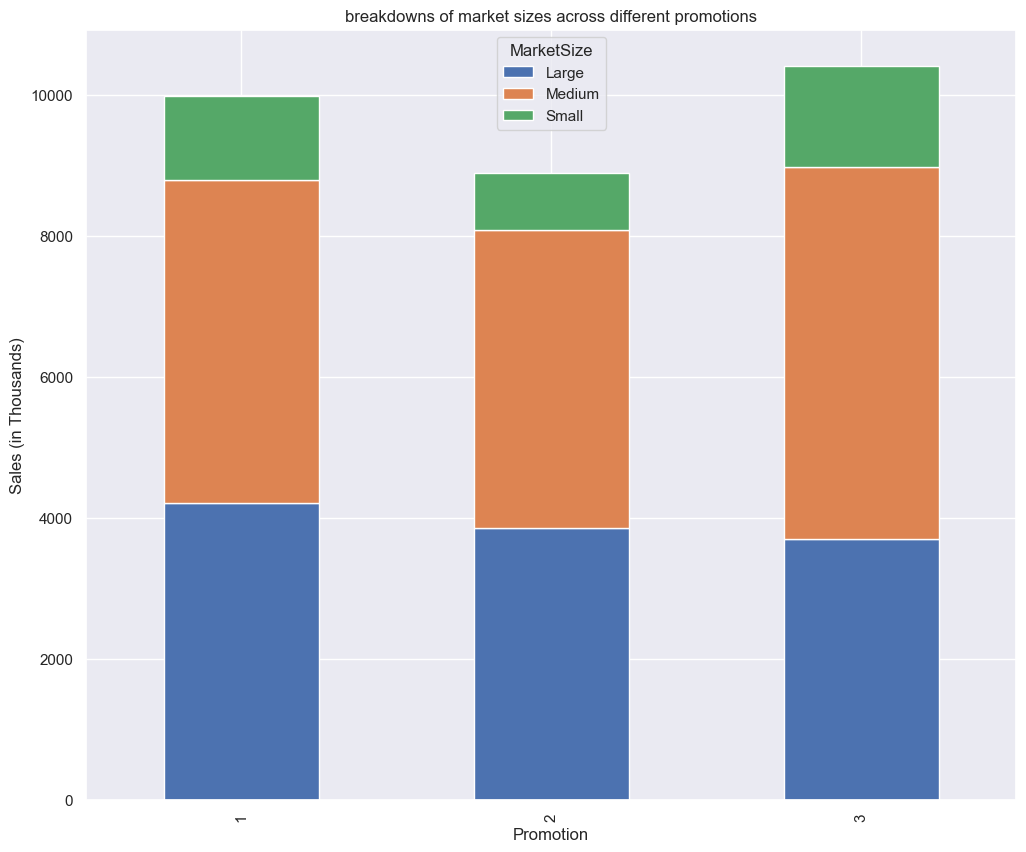

In [14]:
ax = df.groupby([
'Promotion', 'MarketSize'
]).sum()[
'SalesInThousands'
].unstack(
'MarketSize'
).plot(
kind='bar',
figsize=(12,10),
grid=True,
stacked=True
)
ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

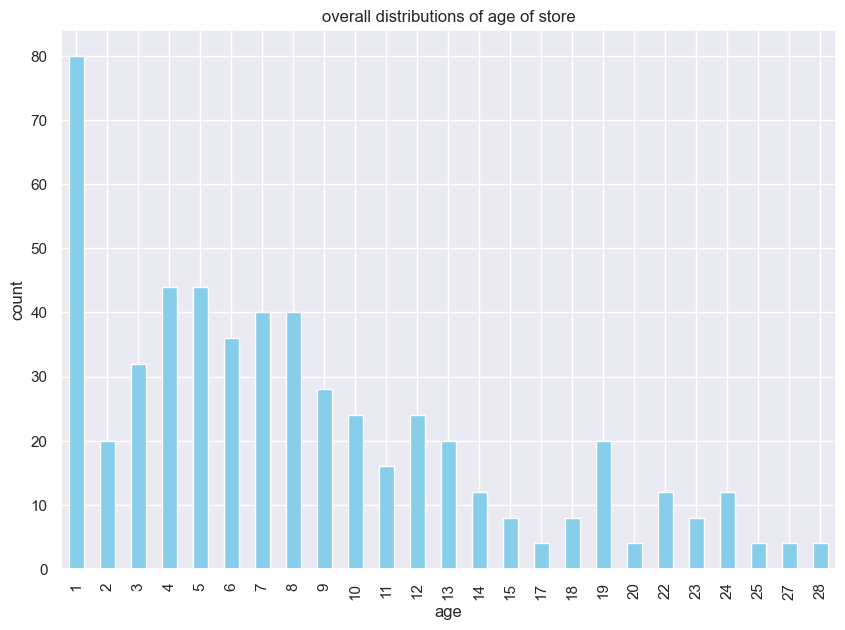

In [15]:
ax = df.groupby(
'AgeOfStore'
).count()[
'MarketID'
].plot(
kind='bar',
color='skyblue',
figsize=(10,7),
grid=True
)
ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')
plt.show()

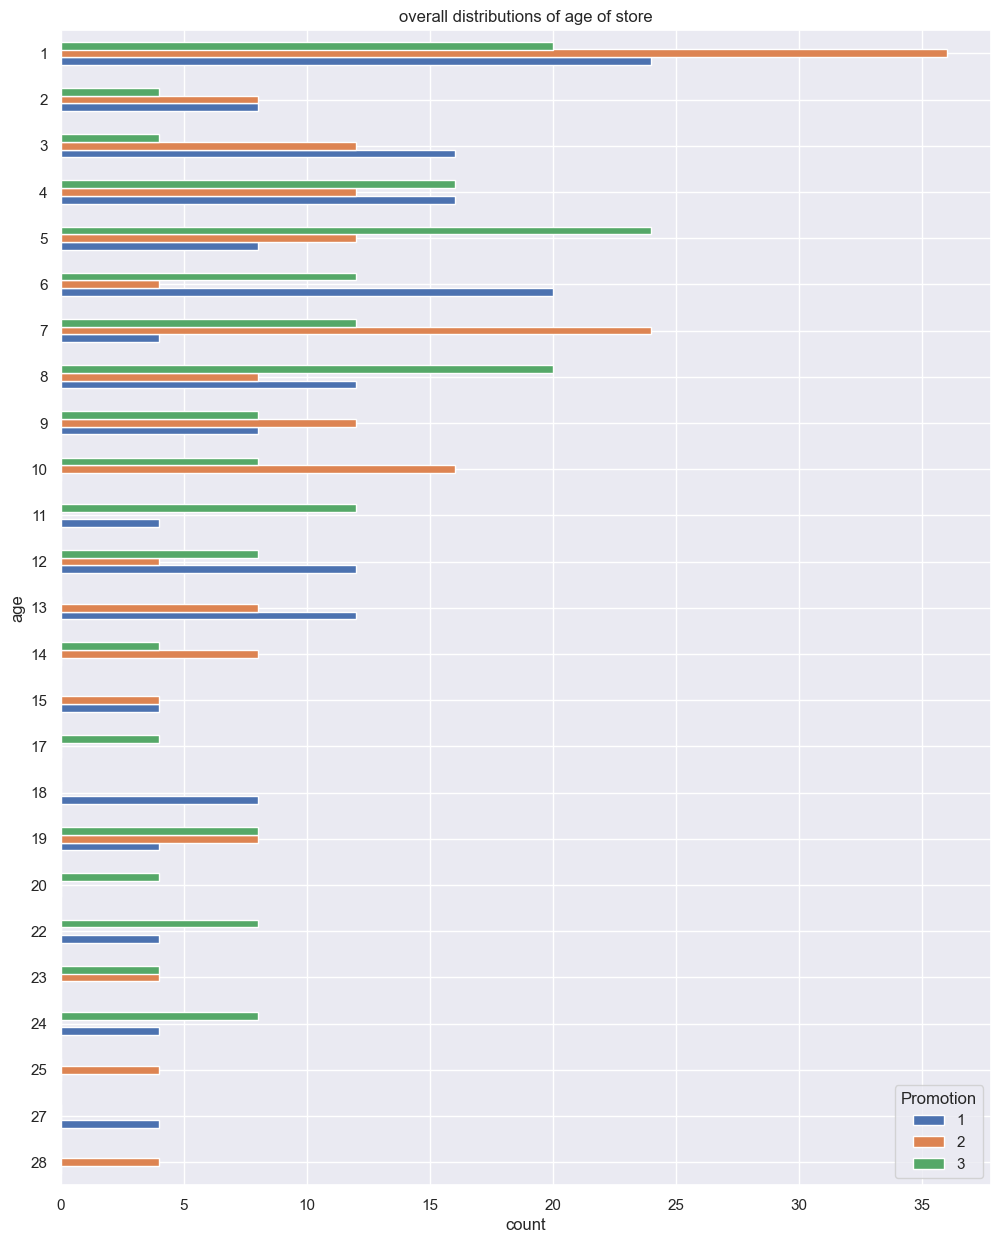

In [17]:
ax = df.groupby(
['AgeOfStore', 'Promotion']
).count()[
'MarketID'
].unstack(
'Promotion'
).iloc[::-1].plot(
kind='barh',
figsize=(12,15),
grid=True
)
ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')
plt.show()

In [18]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


In [20]:
#Statistical hypothesis testing
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

TypeError: Could not convert MediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumSmallSmallSmallSmallLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallSmallMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumMediumLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLargeLarge to numeric

In [21]:
t_1_vs_2 = (
means.iloc[0] - means.iloc[1]
)/ np.sqrt(
(stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
)

NameError: name 'means' is not defined

In [ ]:
from scipy import stats
df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2


In [ ]:
t, p = stats.ttest_ind(
df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
equal_var=False
)